
# 第 7 章

このチュートリアルでは、ファイルに含まれている Simulation クラスを使用して、グラフ、ノードの初期状態、およびノードの状態遷移を指定することにより、ノードのダイナミクスをシミュレートする方法を示す。

目次：
1. シミュレーションクラス
2. 投票者モデル
3. SIS モデル
4. 結論

# 1. シミュレーションクラス

このフォルダには、`Simulation` クラスを含む `simulation.py`ファイルがある。このクラスを使用すると、シミュレーションの記述の詳細をスキップして、興味深い部分に集中することができる。

##  1.1 シミュレーションの構成

シミュレーションは、次の 3 つの主要部分で構成される
1. ノードダイナミクスをシミュレートする環境となるグラフ
2. 各ノードの初期状態
3. 状態の遷移（ここでは関数として定義される）

### 1.1.1 グラフ

これは NetworkX の Graph インスタンスが必要なだけ。この例では、ランダムグラフを使用する。見栄えの良いグラフが得られるまで、必要に応じて次のセルを複数回実行できる。


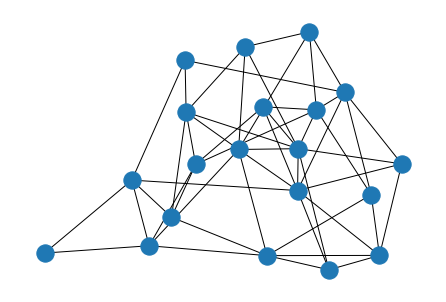

In [1]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)


### 1.1.2 初期状態

これらのシミュレーションでは、状態はキーはノード名で、値はノードの状態で定義された辞書として表される。初期状態をオブジェクトとして直接指定するか、状態辞書を生成する関数を指定することができる。

関数のバージョンはある意味でよりクリーンである。これを使用して、すべてのノードが同じ状態 `'asleep'` を持つ非常に単純な初期状態を生成したい。


In [2]:
# An initial_state function takes one argument, the graph instance.

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state


この関数を下記のようにテストすることで、グラフで機能し、各ノードの状態値を含む辞書を生成することを確認できる。


In [3]:
initial_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}


良さそう。

###  1.1.3 状態遷移

シミュレーションの核心は、状態の遷移である。なぜなら、これは、*ダイナミクスを*指定するものである。Simulation クラスで、状態遷移を表す関数は、グラフと現在状態の辞書という 2 つの引数を取り、更新された状態の辞書を返す。

この単純な例では、各シミュレーションステップで、`'asleep'` 状態の各ノードが一定の確率で `'awake'` 状態に遷移する。このスリープ状態のノードが各ステップで目覚める確率は `P_AWAKEN` として指定される。

ある確率で事象を発生させるために、 `random.random()` 関数を使用して 0 と 1 の間の乱数を生成し、確率の閾値と比較するのは一般的なやり方である。乱数が確率の閾値を下回っている場合は、事象が発生する。


In [4]:
import random

P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'
    return next_state


この関数は、このステップ中に*変化する*状態のみを提供する必要があることに注意させたい。ただし、変化するかどうかにかかわらず、すべてのノードの状態を指定しても害はない。

状態遷移関数が機能することを確認するために、必要に応じて試し実行を行うことができる。


In [5]:
test_state = initial_state(G)
state_transition(G, test_state)

{5: 'awake', 6: 'awake', 10: 'awake', 11: 'awake', 15: 'awake', 17: 'awake'}


このテストの実行では、一部のノードが `'awake'` 状態に移行することが確認できるはずだ。これはOK。

###  1.1.4 ピースを組み立てる

これで、グラフ、初期状態、状態遷移関数の 3 つの部分ができた。それらをシミュレーションの名前と一緒に組み合わせ、Simulation オブジェクトを作成しよう。


In [6]:
from simulation import Simulation

sim = Simulation(G, initial_state, state_transition, name='Simple Sim')


ここで指定する`name`引数はオプショナルで、後で生成する図を管理するためだけのものである。

この Simulation オブジェクトには、いくつかの便利なメソッドがある。最初に、シミュレーションの現在の状態の辞書を返す `.state()` メソッド。


In [7]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}


シミュレーションのステップはまだ行っていないので、状態は初期条件になっているはず。

`.draw()` メソッドを使用して、ノードを状態値で色付けしてネットワークを描画することもできる。


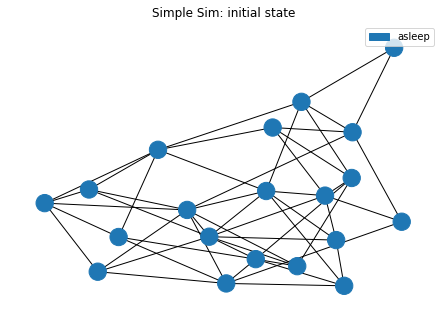

In [8]:
sim.draw()


ご覧の通り、初期条件にはすべてのノードが `'asleep'` である。

##  1.2 シミュレーションの実行

初期条件を確認したら、シミュレーションを実行しよう。シミュレーションは個別の*ステップ*で進み、各ステップでは状態遷移関数は 1 回実行される。

引数なしの `.run()` メソッドは、シミュレーションを 1 ステップ実行する。


In [9]:
sim.run()


状態遷移関数が実行された回数を示す `.steps` プロパティをチェックアウトすることで、シミュレーションが 1 ステップ進んだことを確認できる。


In [10]:
sim.steps

1


`nx.draw()`　関数のキーワード引数を含めることができることに注意して、1 ステップ後にグラフがどのように見えるかを見たい。


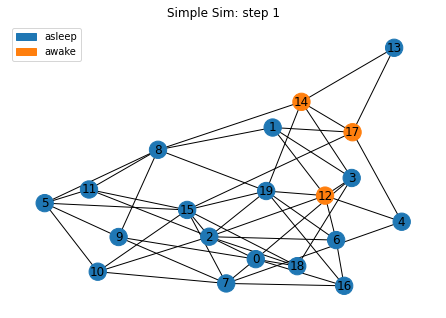

In [11]:
sim.draw(with_labels=True)


一部のノードが「目覚めた」。これは、シミュレーション状態でも確認できる。


In [12]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'awake',
 13: 'asleep',
 14: 'awake',
 15: 'asleep',
 16: 'asleep',
 17: 'awake',
 18: 'asleep',
 19: 'asleep'}


`.run()` メソッドに数値を指定すると、一度に複数のステップでシミュレーションを実行できる。


In [13]:
sim.run(10)

In [14]:
sim.steps

11


`.steps` プロパティでシミュレーションがいくつかのステップを経ったことを確認できる。現在の状態も確認してみよう。


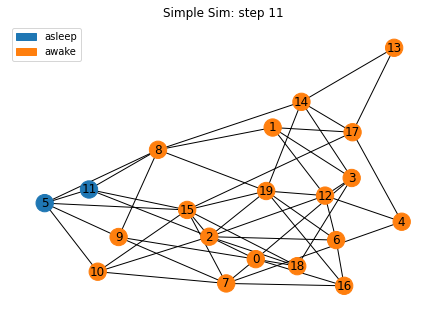

In [15]:
sim.draw(with_labels=True)


## 1.3 結果の可視化

この時点で、すべてまたはほとんどのノードが目覚めているはずが、その移行はどのように行われたのだろうか？徐々に、それとも一緒に目覚めたか？`.plot()` メソッドを使用すると、シミュレーションの各ステップで各状態のノードの割合をプロットできる。


<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

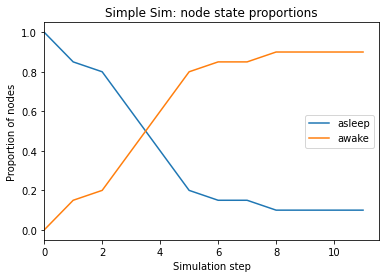

In [16]:
sim.plot()


特定のステップでグラフの状態を可視化する場合は、`.draw()` 関数でそのステップを指定できる。


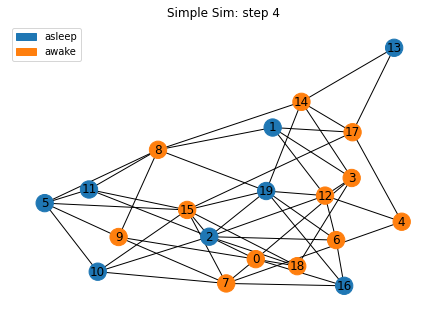

In [17]:
sim.draw(4, with_labels=True)


`.state()` メソッドも同様である。


In [18]:
sim.state(4)

{0: 'awake',
 1: 'asleep',
 2: 'asleep',
 3: 'awake',
 4: 'awake',
 5: 'asleep',
 6: 'awake',
 7: 'awake',
 8: 'awake',
 9: 'awake',
 10: 'asleep',
 11: 'asleep',
 12: 'awake',
 13: 'asleep',
 14: 'awake',
 15: 'awake',
 16: 'asleep',
 17: 'awake',
 18: 'awake',
 19: 'asleep'}


ステップの一部のみをプロットしたい場合は、プロットする最小および/または最大ステップを渡すことでそれを叶える。`.plot()` メソッドに渡される範囲は、Python の `range()` 関数やスライスのように、左閉右開であることに注意してほしい。そのため、`.plot(2, 8)` は 2 から 8 までの状態をプロットするが、8 は*含まない*。


<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

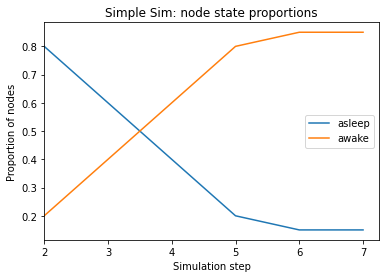

In [19]:
sim.plot(min_step=2, max_step=8)


# 2. 投票者モデル

上記の自明な覚醒・睡眠モデルでは、環境となるグラフ構造を無視し、各ノードのダイナミクスは隣接ノードから独立している。興味深いネットワークモデルでは、何らかの方法でグラフの連結性を利用している。

投票者モデルは、興味深い結果を生み出すことができるネットワーク意見ダイナミクスの単純なモデルである。このモデルは教科書で詳しく説明されており、ここで実装したい。

##  2.1 シミュレーションの作成

### 2.1.1 グラフ

前と同じように、ここで別のランダムグラフを使用する。


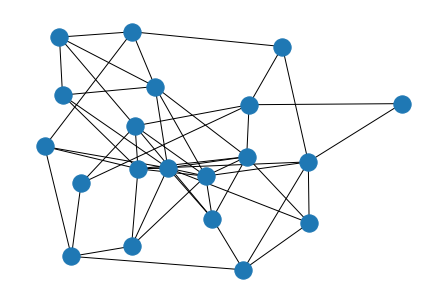

In [20]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)


### 2.1.2 初期状態

初期状態では、A から D までの文字をランダムに選択して、各ノードに状態を割り当てる。ここでは状態の種類は 2 に限定されません！

初期状態関数と状態遷移関数の両方で `random.choice()` を使用する。この関数は、特定のコレクションから 1 つのアイテムをランダムに選択するために使用される。


In [21]:
import random
import string

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state


これが機能することを確認したい。


In [22]:
initial_state(G)

{0: 'A',
 1: 'B',
 2: 'B',
 3: 'C',
 4: 'C',
 5: 'C',
 6: 'D',
 7: 'C',
 8: 'D',
 9: 'B',
 10: 'C',
 11: 'D',
 12: 'C',
 13: 'B',
 14: 'C',
 15: 'B',
 16: 'C',
 17: 'D',
 18: 'D',
 19: 'A'}


### 2.1.3 状態遷移

有権者モデルの中心となるアルゴリズムは次のように機能する：グラフ内の各ノードに対して、ランダムに隣接ノードを選択し、その「意見」を採択する。つまり、このノードの状態を隣接ノードと同じ値に設定する。

* グラフの各ノードに対し
  * 隣接ノードをランダムに選ぶ
  * このノード状態を選ばれたノードと同じく設定する

In [23]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        # Caveat: what if the node has no neighbors?
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state


先に進む前に、これをテストしたい。


In [24]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'C',
 1: 'B',
 2: 'B',
 3: 'B',
 4: 'B',
 5: 'A',
 6: 'B',
 7: 'A',
 8: 'D',
 9: 'B',
 10: 'B',
 11: 'A',
 12: 'D',
 13: 'C',
 14: 'A',
 15: 'C',
 16: 'A',
 17: 'C',
 18: 'A',
 19: 'A'}


### 2.1.4 シミュレーションインスタンス

いいね。次に、シミュレーションを作成して初期状態を可視化したい。


In [25]:
import matplotlib.pyplot as plt

sim = Simulation(G, initial_state, state_transition, name='Voter Model')

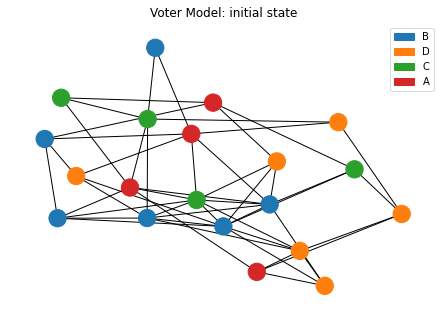

In [26]:
sim.draw()

# 凡例中のラベルの順番を気にする場合、
# .draw() のキーワード引数として 
# labels='ABCD' を指定することができる。


## 2.2 シミュレーションを実行する

このシミュレーションを何ステップかで実行して、最終的な結果を見たい。


In [27]:
sim.run(40)

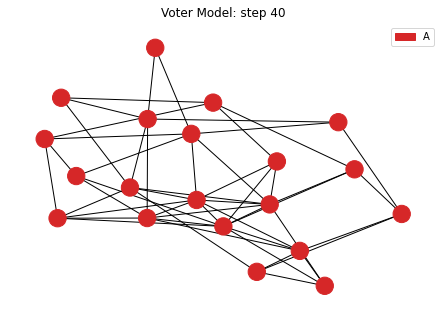

In [28]:
sim.draw()


## 2.3 結果を視覚化する

おそらく初期状態とはかなり異なる状態だね。ここにたどり着いた経緯を見たい。


<AxesSubplot:title={'center':'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

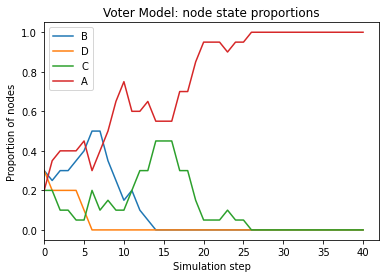

In [29]:
sim.plot()

前の数セルをもう一度実行し、シミュレーションを進めて状態を調べ、長期定常状態に達するまで続ければ、定常状態ですべてのノードは最終的に同じ状態になるはずだとわかる。


## 2.4 同期更新と非同期更新

書かれているように、この `state_transition` 関数は**同期**更新を行う。つまり、関数が新しい状態を返した後、*すべて*のノードの状態が論理上、同時に更新される。


In [30]:
# This is the same as in 2.1.3
import random

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

各ノードの更新が同じ情報に基づいて行われるように、この関数が `current_state` の値を決して変更しないことに注意させたい。各ノードは同じ状態を「見ている」ので、ノードを更新する順番は問題ではない。これはすべてのノードの状態を同時に更新することと同じである。

この場合、各ノードは `current_state` をインプレースで変更する**非同期**更新を行い、このステップで行われた状態の変更を確認する。

In [31]:
# This example is potentially biased, don't use it
def state_transition_async(G, current_state):
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state


この例では、 `current_state` の各ノードからの「視点」には、同ステップにおける他のノードの更新によって行われた変更が反映される。

ただし、ここには潜在的な問題がある。それは、`G.nodes` が常に同じ順序でノードを返す可能性が高いため、更新が同じ順序で実行され、バイアスが生じる可能性があることである。代わりに、毎回ランダムな順序でノードをループする必要がある。


In [32]:
def state_transition_async(G, current_state):
    # Randomizing the update order prevents bias
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state


この新しい状態遷移関数を `Simulation` クラスに渡して利用し、それを実行して上記の同期バージョンと比較したい。


<AxesSubplot:title={'center':'Async Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

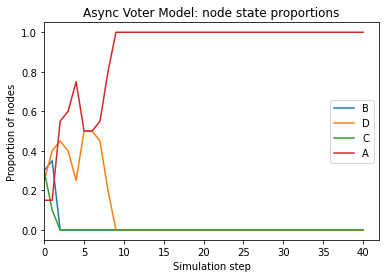

In [33]:
sim = Simulation(G, initial_state, state_transition_async, name='Async Voter Model')
sim.run(40)
sim.plot()


非同期更新は、シミュレーションの特定のダイナミクスに応じて、異なる結果を生成する場合と生成しない場合がある。一方で、同期更新は、利点である仮定の点でわずかに単純であるが、特定の更新メカニズムは、非同期更新なしでは定常状態に収束できない可能性もある。

##  2.5 停止条件

状況によってはシミュレーションを早期に終了させる条件を指定したい場合があるかもしれない。この投票者モデルの例では、すべてのノードが同じ状態になると、システムの状態は変更できないことがわかる。必要以上に長くシミュレーションを実行することを避けるために、すべてのノードが同じ状態である場合にシミュレーションを停止する停止条件を指定したい。

この関数は、状態遷移関数と同じように、グラフと現在の状態を引数として取り、モデルを停止する必要がある場合は `True` を返す。


In [34]:
def stop_condition(G, current_state):
    unique_state_values = set(current_state.values())
    is_stopped = len(unique_state_values) <= 1
    return is_stopped


停止条件を指定して投票者モデルの別のインスタンスを作成し、必要と思われるよりも多くのステップで実行したい。停止条件にバグがあり、True が返されない場合に備えて、最大ステップ数を指定する必要もある。

In [35]:
sim = Simulation(G, initial_state, state_transition, stop_condition, name='Voter model')
sim.run(100)

Stop condition met at step 25.


In [36]:
sim.steps

25

<AxesSubplot:title={'center':'Voter model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

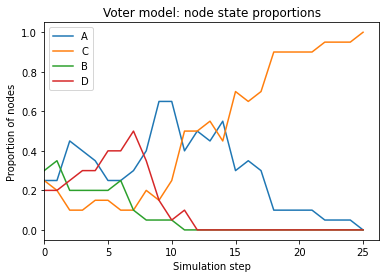

In [37]:
sim.plot()


## 2.6 グラフの再配線

状態遷移関数で Graph のインスタンスにアクセスできるため、問題設定上の必要に応じてグラフ内のリンクを追加または削除できる。投票者モデルを拡張し、状態が異なる場合にノード間のエッジを一定確率で削除することで、ノードが別のノードの「フレンドを解除」できるようにしたい。


In [38]:
def state_transition_async_rewiring(G, current_state):
    # Randomizing the update order prevents bias
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            # This is the same as before
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
            # This is the new part
            neighbor = random.choice(list(G.neighbors(node)))
            if current_state[node] != current_state[neighbor]:
                G.remove_edge(node, neighbor)
            
    return current_state

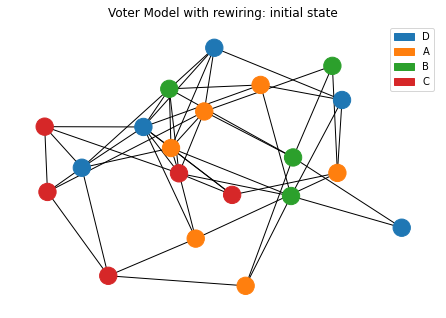

In [39]:
sim = Simulation(G, initial_state, state_transition_async_rewiring, stop_condition,
                 name='Voter Model with rewiring')
sim.draw()

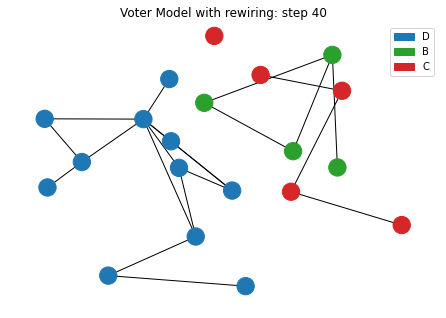

In [40]:
sim.run(40)
sim.draw()

<AxesSubplot:title={'center':'Voter Model with rewiring: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

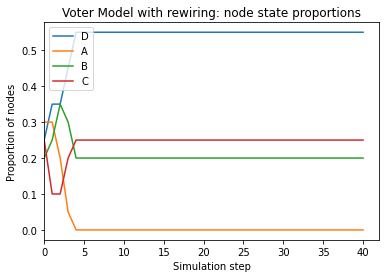

In [41]:
sim.plot()


この変更されたシミュレーションの長期的な動作は、以前のモデルとは異なる。具体的に、多くの場合、ネットワークが分断された構成になり、各ノードにはすべて同じ状態のノードが含まれる。そのため、書かれている停止条件は発動しない。この状態遷移関数に対して適切な `stop_condition` 関数を作成することは、読者の演習課題として残されたい。



# 3. SIS モデル

これは、ネットワーク上でダイナミクスを拡散する基本的なモデルの 1 つであり、本で詳しく説明されている。シミュレーションフレームワークを使用して、この拡散モデルを実装したい。

## 3.1 シミュレーションの作成

### 3.1.1 グラフ


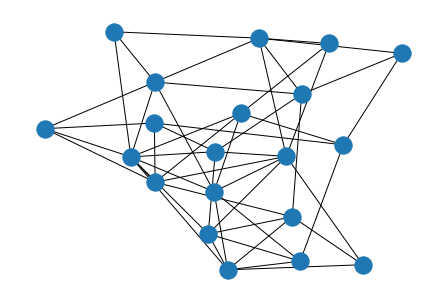

In [42]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)


### 3.1.2 初期状態

最初にすべてのノードを「S」状態に割り当て、ランダムに 1 つのノードを選択して感染させ、「I」状態に設定する。「患者ゼロ」ノードのさまざまな選択、たとえば、高次ノードまたは低次ノードを選択すること、を試して感染させ、それが拡散ダイナミクスにどのように影響するかを確認させたい。


In [43]:
import random

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'
    
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state


まず、これが機能することを確認したい。


In [44]:
initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'I',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}


### 3.1.3 状態遷移

SIS モデルには 2 つのパラメーターが含まれる。$\beta$ は、感染した隣人（隣接ノード）が存在する場合に S から I に遷移する確率であり、$\mu$ は I から S に遷移する確率である。

疑似コードでは、アルゴリズムは：

* グラフの各ノードに対して
  * ノードの状態が I の場合
    * ノードは確率 $\mu$ で状態 S に遷移する

  * ノードの状態は S の場合
    * ノードの隣接ノードごとに
      * 隣接ノードの状態が I の場合
        * 隣接ノードは確率 $\beta$ で状態 I に遷移する

となる。モデルの論理はインデントで少し深くなるが、コードはこの疑似コードに非常によく似ている。


In [45]:
MU = 0.1
BETA = 0.1

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else: # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'

    return next_state


先に進む前に、これをテストしたい。


In [46]:
test_state = initial_state(G)
state_transition(G, test_state)

{14: 'I'}

パラメータ値によっては、最初の遷移で状態が変化しない可能性がある。これは問題ではなく、予想される状況である。状態が更新されて空でない辞書が生成されるまでには、数回の試行が必要になる場合もある。コードの正確性をチェックしているだけなので、これをスキップしても問題ないが、シミュレーションの文脈よりもここでデバッグする方が簡単である。



### 3.1.4 シミュレーション

次に、シミュレーションを作成して初期状態を可視化する。


In [47]:
sim = Simulation(G, initial_state, state_transition, name='SIS model')

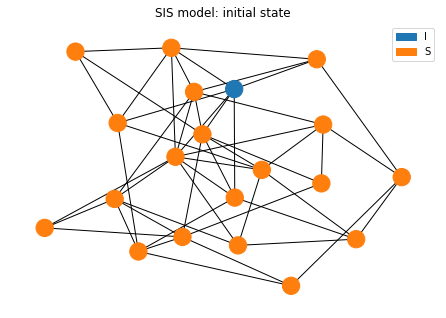

In [48]:
sim.draw()


## 3.2 シミュレーションを実行する

このシミュレーションを何ステップかで実行して、最終的な結果を見たい。


In [49]:
sim.run(25)

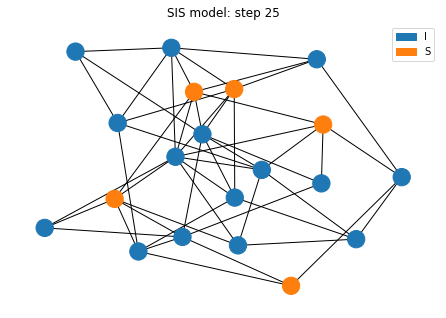

In [50]:
sim.draw()


おそらく初期状態とはかなり異なる状態だね。ここにたどり着いた経緯を見たい。


<AxesSubplot:title={'center':'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

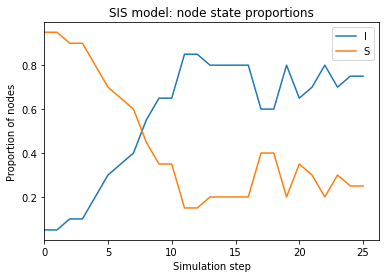

In [51]:
sim.plot()


先に進み、前の何個かのセルを再度実行し、シミュレーションを実行して状態を調べ、長期的な安定状態に到達するとわかる。最終的には、各ノード状態の割合が平均値の周りで変動するため、割合曲線は平坦になる。

`BETA` および `MU` パラメータ値を調整し、定常状態がどのように変化するかを確認してみて！


# 4. 結論

投票者モデルとSISモデルという「実際の」モデルのそれぞれにおいて、私たちは多くのステップをまったく同じ方法で実行した。これは、異なるシミュレーション間でどの部分が異なり、どの部分が変わらないかを明確に示すためである。例えば、閾値モデルは投票者モデルをそのまま拡張したものであり、SIRモデルはSISモデルを拡張したものである。

また、同じパラメーターを使ったシミュレーションで、グラフが異なるとどのように結果が異なるかを比較することも、探求に値する一つの道である。例えば、ノードとエッジの数が同じで、Barabási-Albert モデルで作成されたグラフと $G_{n,m}$ ランダムグラフで作成されたグラフで、SISの性能は異なるか？